# Customer Segmentation based on Credit Card Usage (using K-means Clustering and PCA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the data

In [2]:
creditcard_df = pd.read_csv(r'Marketing_data.csv',header=0)
creditcard_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
#18 features with 8950 records
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

In [5]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [6]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [7]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

# VISUALIZE AND EXPLORE DATASET

<AxesSubplot:>

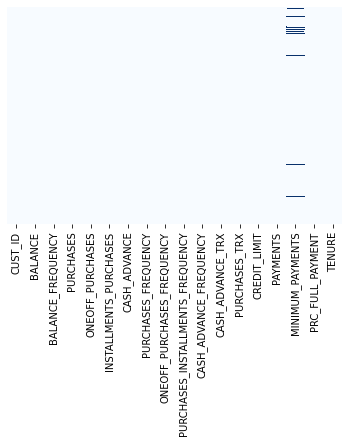

In [8]:
# Let's see if we have any missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Missing value imputation

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [12]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [13]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [14]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [15]:
n = len(creditcard_df.columns)
cols=creditcard_df.columns
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

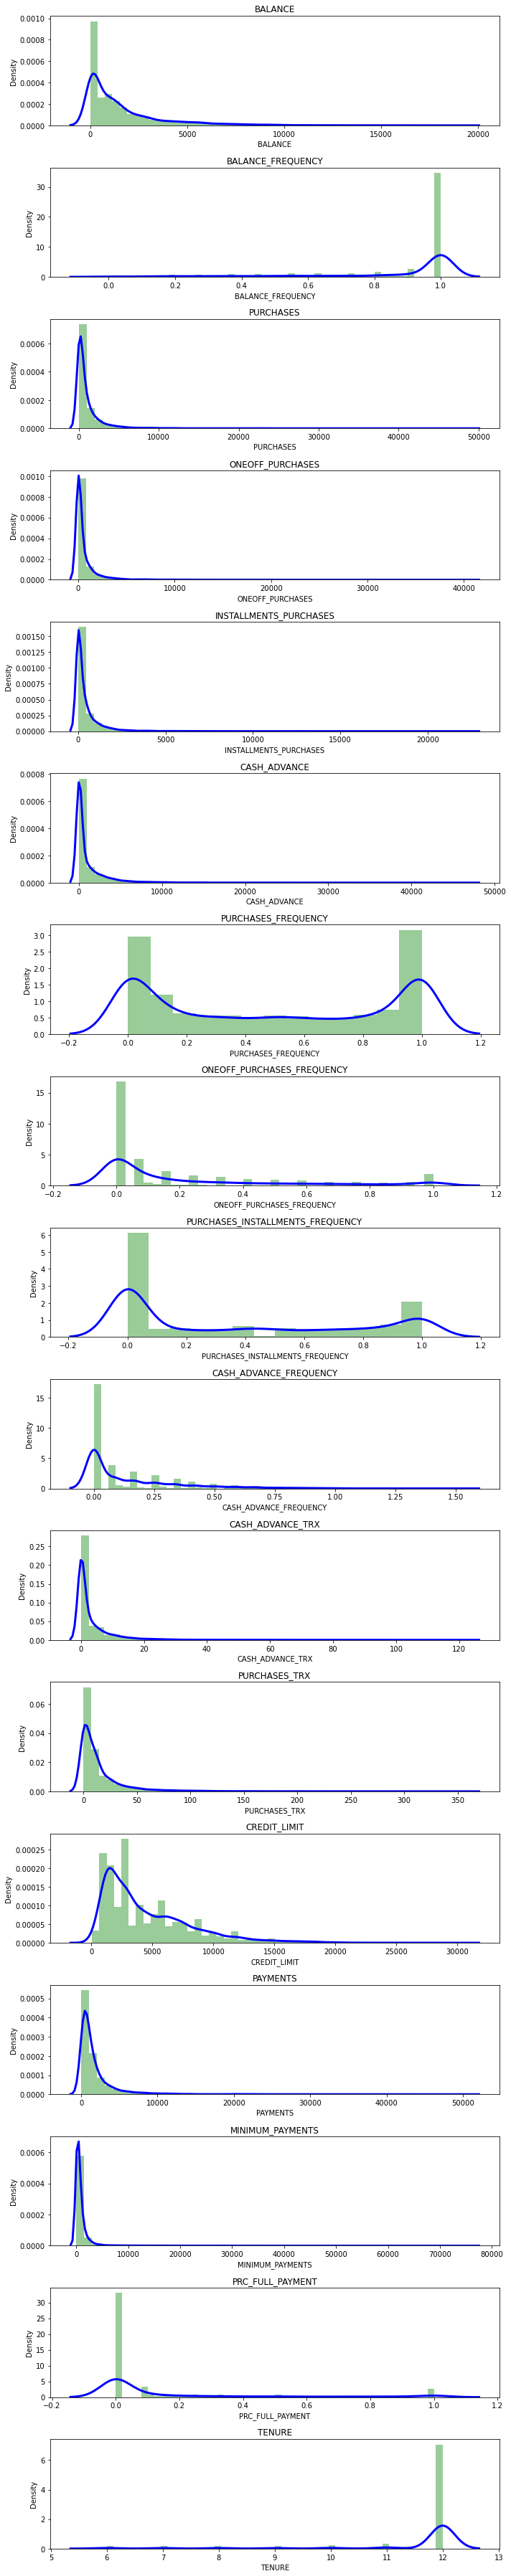

In [16]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

There is a lot of skewness specially right skewness in some of the features, we should do Normalize to handle skewness 

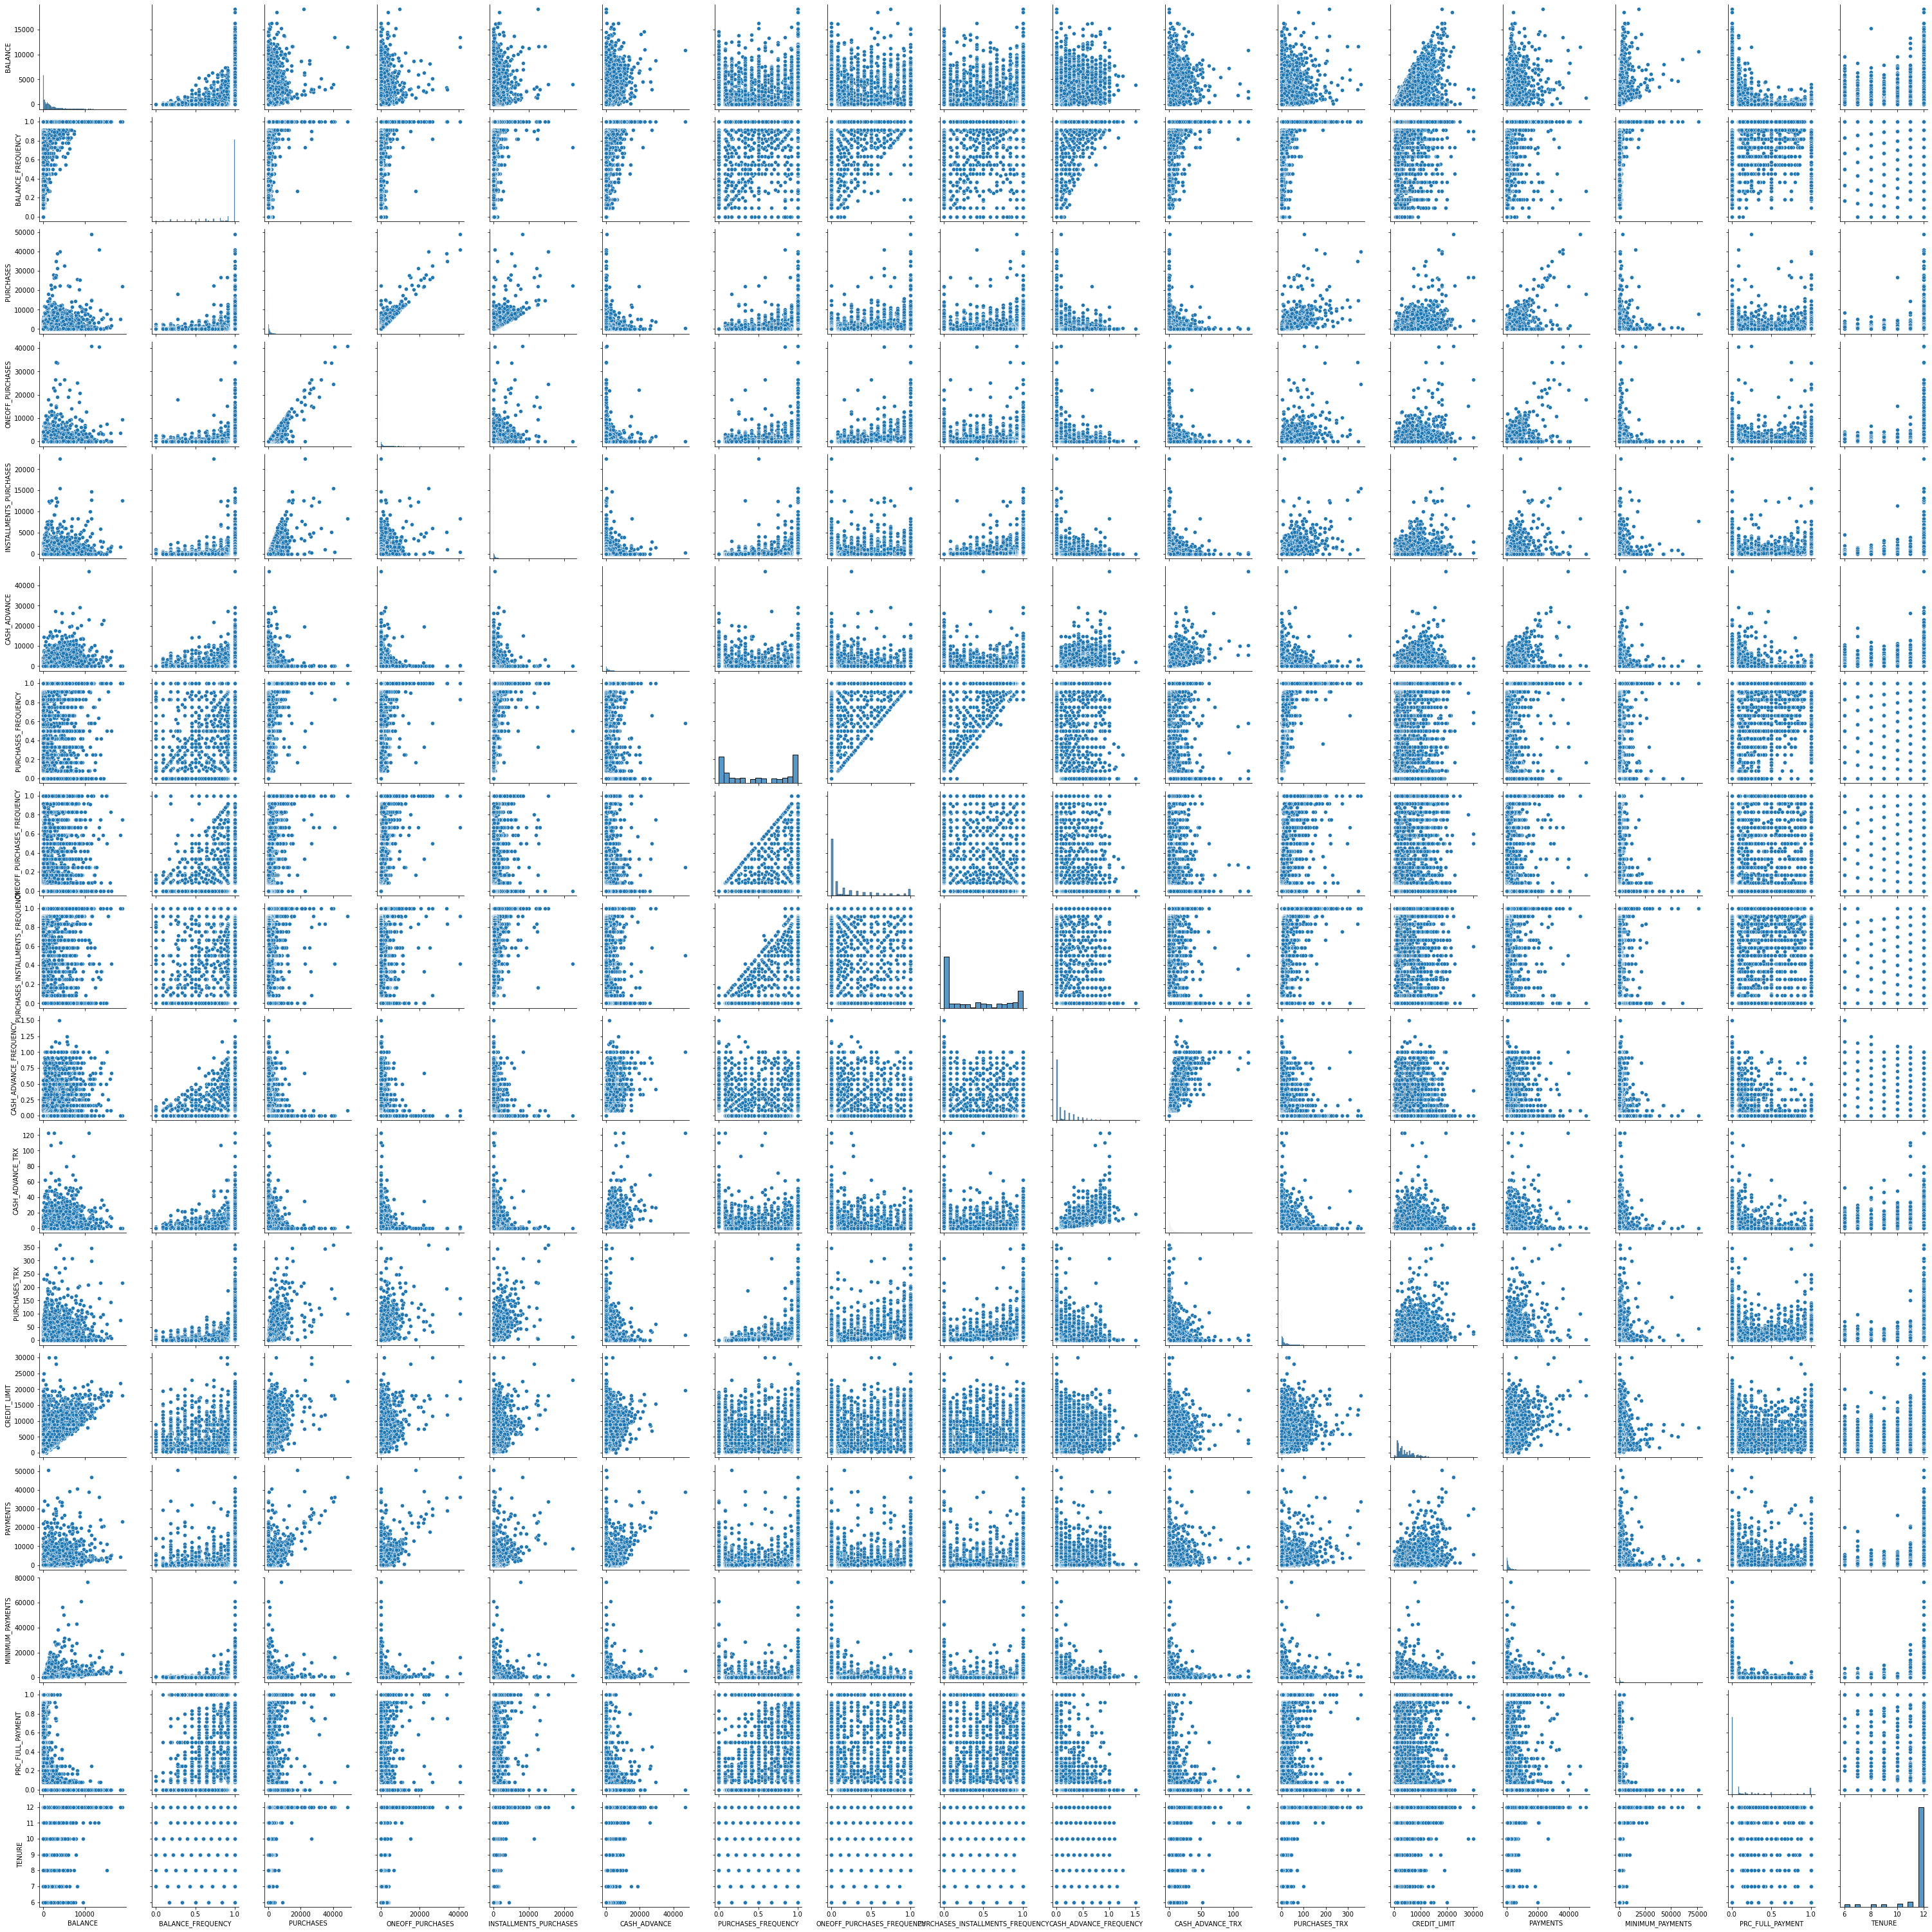

In [18]:
 sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


# Looking for some correlation

In [19]:
correlations = creditcard_df.corr()
correlations

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

<AxesSubplot:>

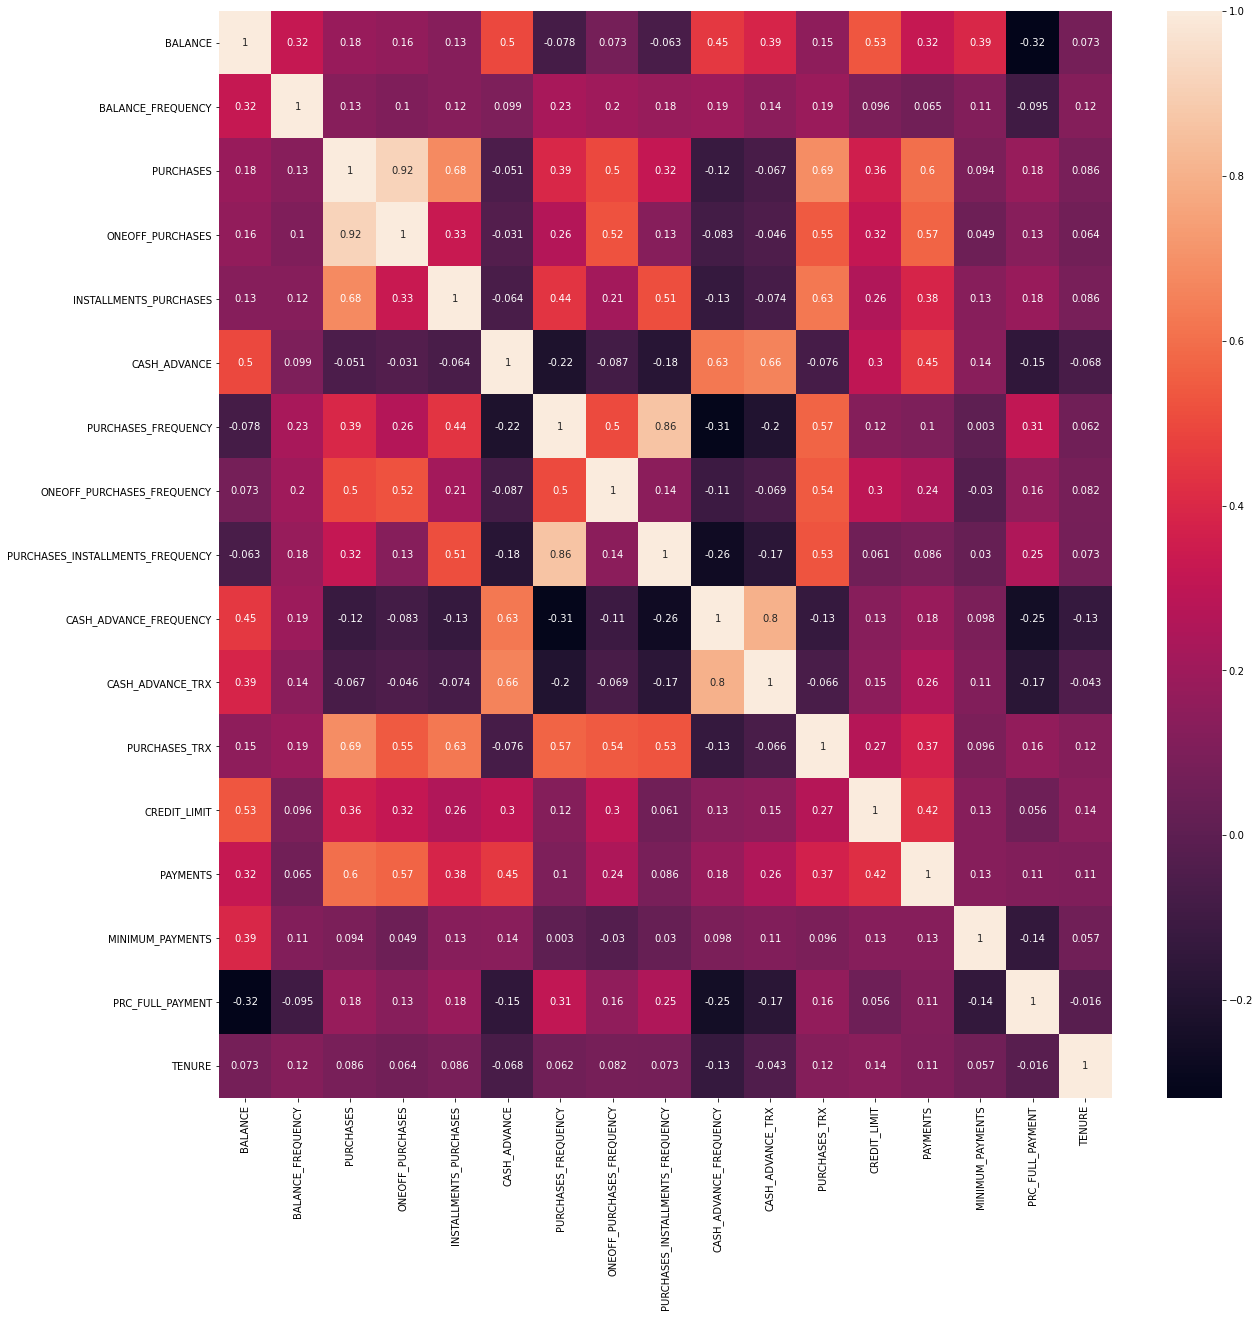

In [20]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [21]:
# Let's Standardize the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

#Normalizing the Data 
creditcard_df_normalized= normalize(creditcard_df_scaled) 

# Converting the numpy array into a pandas DataFrame 
creditcard_df_normalized = pd.DataFrame(creditcard_df_normalized,columns=cols) 

In [22]:
creditcard_df_normalized.shape

(8950, 17)

In [23]:
creditcard_df_normalized.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.311938          -0.106297  -0.181072         -0.152108   
1  0.219925           0.037539  -0.131222         -0.099749   
2  0.126682           0.146783  -0.030504          0.030850   
3  0.020589          -0.426439   0.097309          0.229034   
4 -0.151595           0.218909  -0.195238         -0.146744   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.148760     -0.198921            -0.343687   
1               -0.127037      0.728166            -0.341434   
2               -0.128790     -0.132249             0.359771   
3               -0.190618     -0.154587            -0.425253   
4               -0.192075     -0.197234            -0.428504   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.289212                         -0.301422   
1                   -0.189660                         -0.256265   
2                    0.757440                         -0.259802   
3                   -0.167447                         -0.384524   
4                   -0.168727                         -0.387463   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.287801         -0.202878      -0.217905     -0.409290   
1                0.160401          0.030761      -0.165384      0.192448   
2               -0.191339         -0.134880      -0.030888      0.234039   
3               -0.108570         -0.138184      -0.231288      0.346393   
4               -0.285359         -0.201157      -0.233056     -0.382591   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.225425         -0.132519         -0.223964  0.153704  
1  0.228779          0.024959          0.065457  0.100796  
2 -0.108739         -0.028803         -0.148899  0.102187  
3 -0.251048          0.000000         -0.220379  0.151244  
4 -0.153959         -0.112306         -0.222064  0.152400

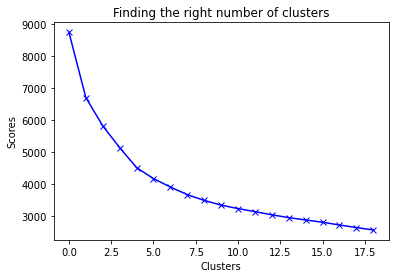

In [28]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_normalized)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()



From this we can observe that, 4th cluster seems to be forming the elbow of the curve. However, the values does not reduce linearly until 8th cluster. 
Let's choose the number of clusters to be 7.

# APPLY K-MEANS METHOD

In [30]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_normalized)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(7, 17)

In [31]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers   

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.216039         -0.005086 -0.017482        -0.075574   
1 -0.069228          0.203456 -0.167226        -0.113482   
2  0.264033          0.106679 -0.082536        -0.060275   
3  0.018255          0.113792  0.178920         0.182686   
4 -0.123935          0.166641 -0.049469        -0.106092   
5 -0.083472         -0.069845 -0.070919        -0.049005   
6 -0.221909         -0.622423 -0.099849        -0.073585   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.097460    -0.139927            0.237734   
1              -0.186833    -0.115054           -0.398648   
2              -0.084446     0.268225           -0.175826   
3               0.087330    -0.081105            0.241352   
4               0.077975    -0.150529            0.361362   
5              -0.077480     0.003628           -0.059135   
6              -0.100853    -0.104507           -0.183924   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.112047                         0.275292   
1                  -0.181535                        -0.354190   
2                  -0.091112                        -0.151712   
3                   0.417832                         0.085480   
4                  -0.163655                         0.443473   
5                  -0.065903                        -0.069241   
6                  -0.134311                        -0.151132   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.198614        -0.142288      0.011180    -0.039380   
1              -0.061802        -0.093267     -0.223873    -0.212853   
2               0.347136         0.273583     -0.104247     0.120903   
3              -0.100995        -0.080796      0.211989     0.124080   
4              -0.185357        -0.143833      0.040787    -0.178278   
5               0.055939        -0.010575     -0.096529    -0.140186   
6              -0.165403        -0.121607     -0.135931    -0.069265   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.075408        -0.090002         0.595934  0.049193  
1 -0.150932        -0.056902        -0.213867  0.137989  
2  0.067367         0.066984        -0.114605  0.050844  
3  0.065123        -0.016878         0.019257  0.080752  
4 -0.114501        -0.019883        -0.150677  0.124210  
5 -0.098352        -0.052133        -0.039995 -0.714072  
6 -0.081972        -0.083802        -0.003516  0.079765

In [32]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  1114.807111          0.876066   965.854018       467.000696   
1  1420.382112          0.925468   645.923498       404.079736   
2  2114.036293          0.902542   826.865364       492.393412   
3  1602.470661          0.904227  1385.469121       895.659171   
4  1306.513958          0.916746   897.512959       416.346560   
5  1390.733909          0.860725   851.685803       511.098630   
6  1102.590051          0.729825   789.876278       470.300745   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             499.199120   685.437585            0.585765   
1             242.116966   737.598362            0.330354   
2             334.704435  1541.351842            0.419783   
3             490.039351   808.789367            0.587217   
4             481.579219   663.204792            0.635382   
5             341.003825   986.479952            0.466617   
6             319.867102   759.715985            0.416533   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.169032                         0.473845   
1                   0.148302                         0.223673   
2                   0.175277                         0.304143   
3                   0.327105                         0.398409   
4                   0.153636                         0.540685   
5                   0.182798                         0.336919   
6                   0.162390                         0.304374   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.095399         2.277817     14.987730  4351.167841   
1               0.122777         2.612348      9.145192  3720.001671   
2               0.204610         5.115829     12.118635  4934.343322   
3               0.114934         2.697452     19.979086  4945.904701   
4               0.098052         2.267274     15.723635  3845.800014   
5               0.146338         3.176661     12.310477  3984.396019   
6               0.102045         2.418949     11.331103  4242.433966   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  1514.846351       654.460500         0.328015  11.583151  
1  1296.211068       731.599955         0.091162  11.701983  
2  1928.164212      1020.309635         0.120195  11.585361  
3  1921.669935       824.873949         0.159347  11.625385  
4  1401.674459       817.870370         0.109644  11.683543  
5  1448.424438       742.712640         0.142017  10.561707  
6  1495.843408       668.910619         0.152686  11.624064

In [ ]:
# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


In [33]:
labels.shape # Labels associated to each data point

(8950,)

In [34]:
labels.max()

6

In [35]:
labels.min()

0

In [36]:
y_kmeans = kmeans.fit_predict(creditcard_df_normalized)
y_kmeans

array([6, 1, 2, ..., 0, 0, 0])

In [37]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df_normalized, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.311938          -0.106297  -0.181072         -0.152108   
1  0.219925           0.037539  -0.131222         -0.099749   
2  0.126682           0.146783  -0.030504          0.030850   
3  0.020589          -0.426439   0.097309          0.229034   
4 -0.151595           0.218909  -0.195238         -0.146744   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.148760     -0.198921            -0.343687   
1               -0.127037      0.728166            -0.341434   
2               -0.128790     -0.132249             0.359771   
3               -0.190618     -0.154587            -0.425253   
4               -0.192075     -0.197234            -0.428504   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.289212                         -0.301422   
1                   -0.189660                         -0.256265   
2                    0.757440                         -0.259802   
3                   -0.167447                         -0.384524   
4                   -0.168727                         -0.387463   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.287801         -0.202878      -0.217905     -0.409290   
1                0.160401          0.030761      -0.165384      0.192448   
2               -0.191339         -0.134880      -0.030888      0.234039   
3               -0.108570         -0.138184      -0.231288      0.346393   
4               -0.285359         -0.201157      -0.233056     -0.382591   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0 -0.225425         -0.132519         -0.223964  0.153704        1  
1  0.228779          0.024959          0.065457  0.100796        2  
2 -0.108739         -0.028803         -0.148899  0.102187        3  
3 -0.251048          0.000000         -0.220379  0.151244        6  
4 -0.153959         -0.112306         -0.222064  0.152400        1

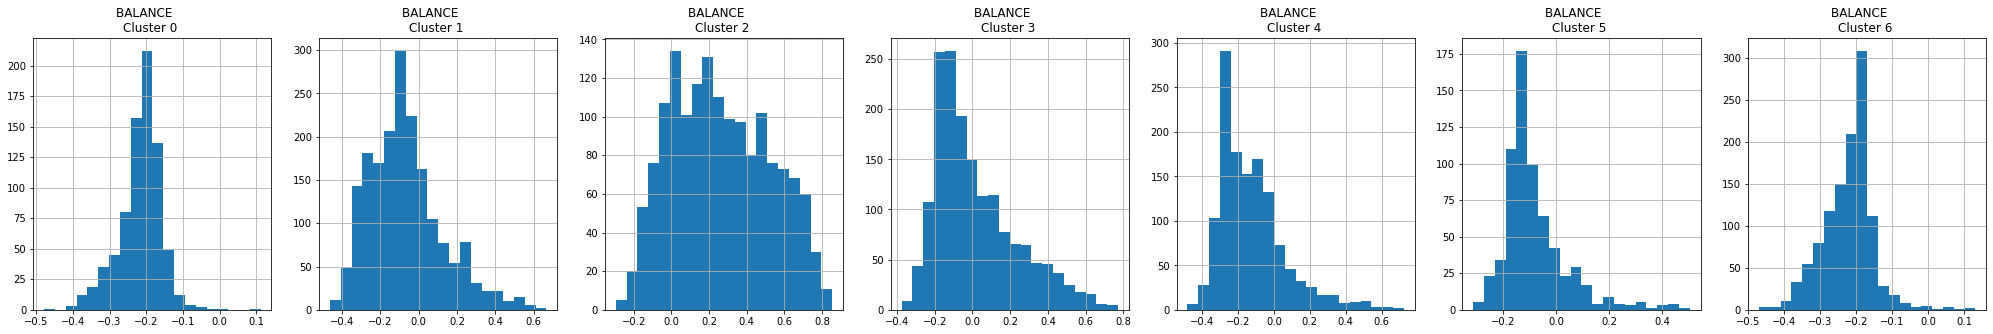

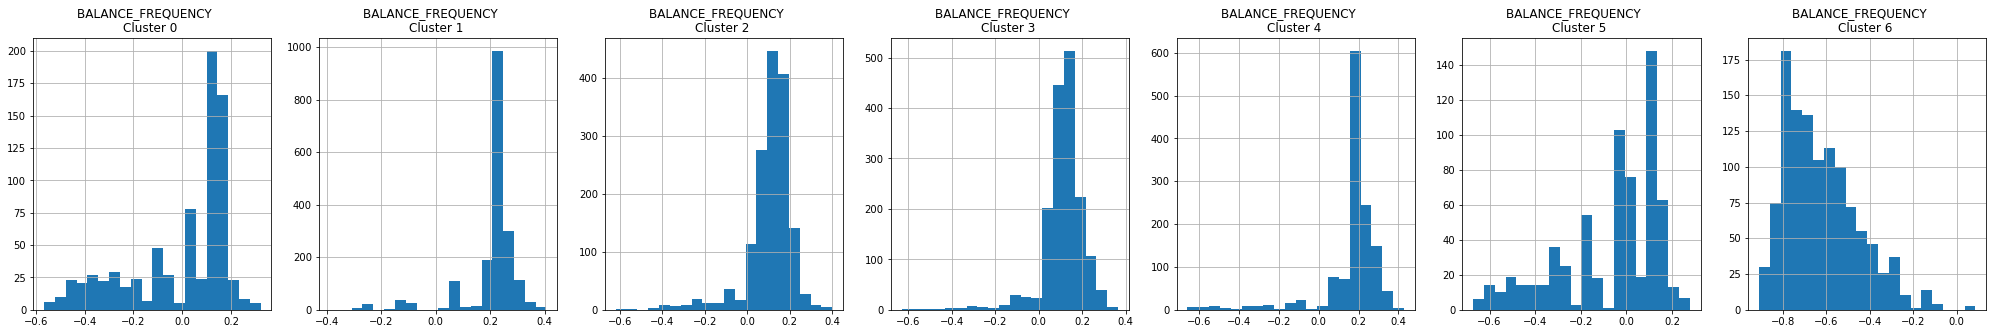

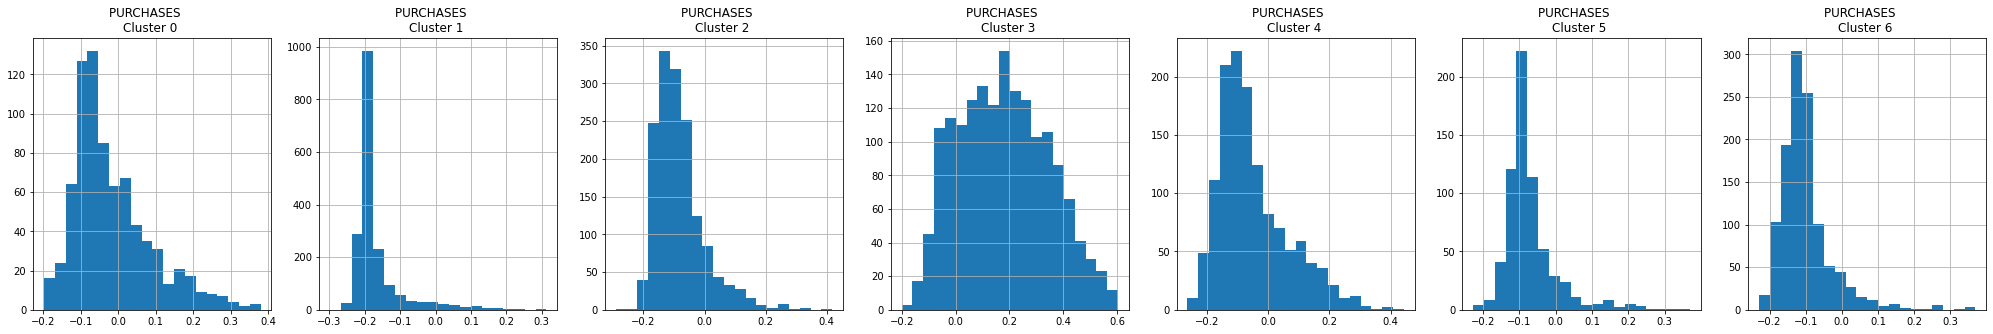

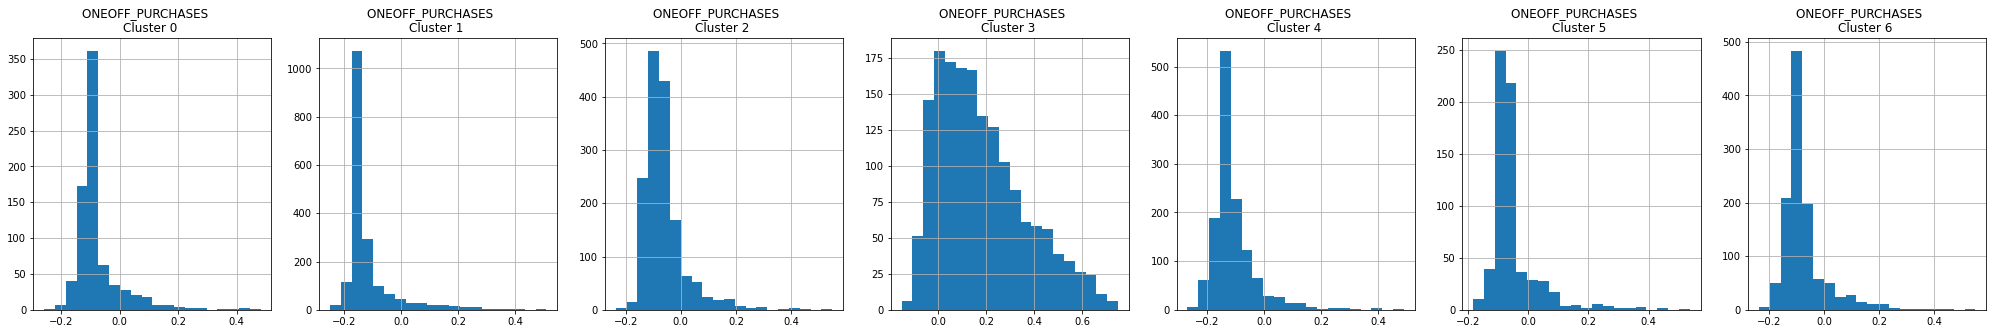

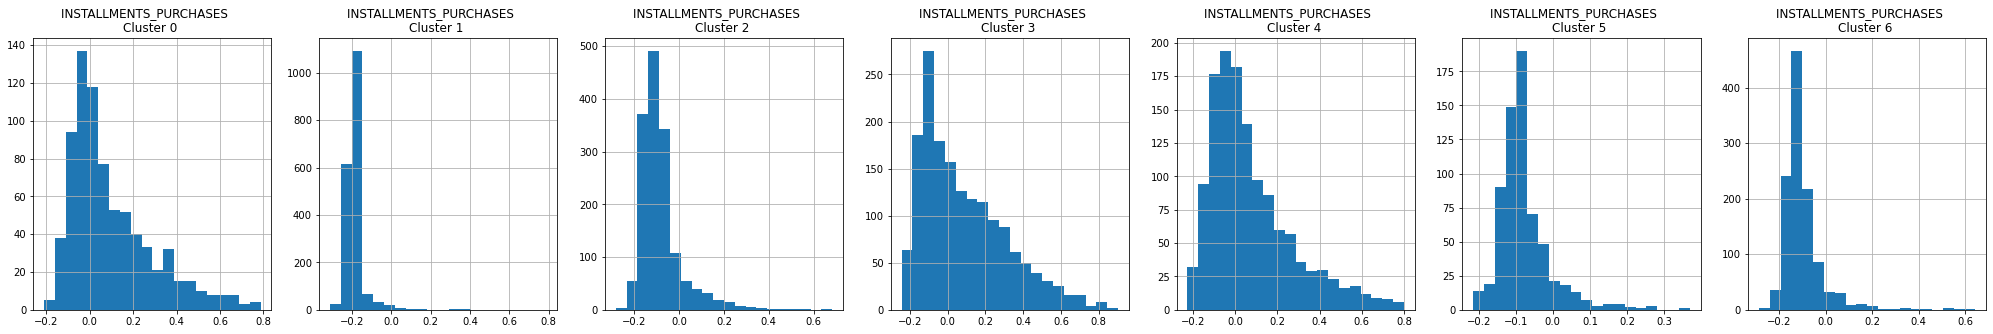

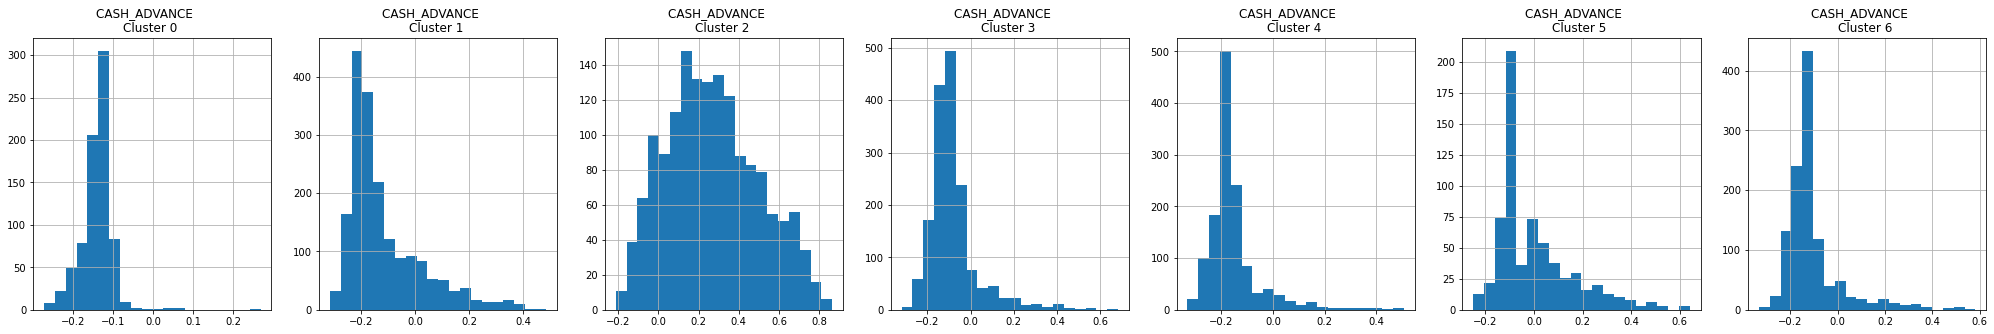

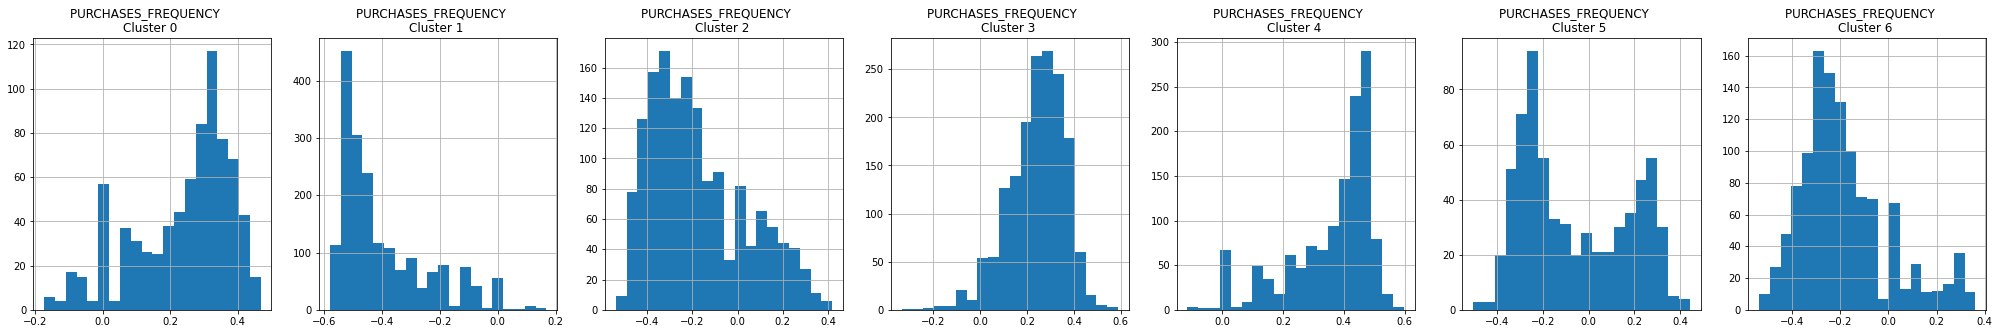

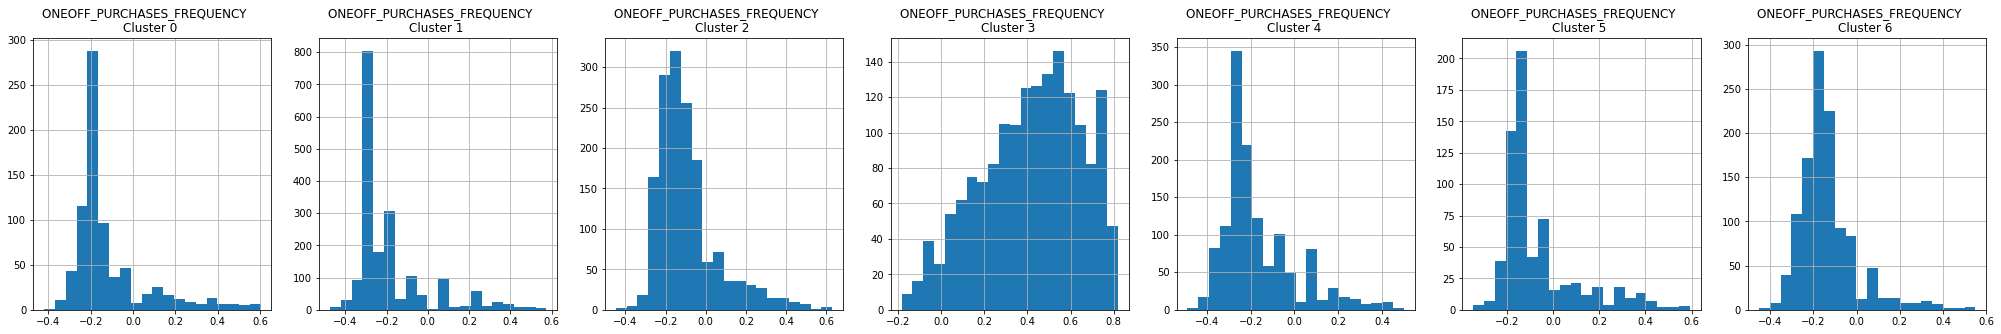

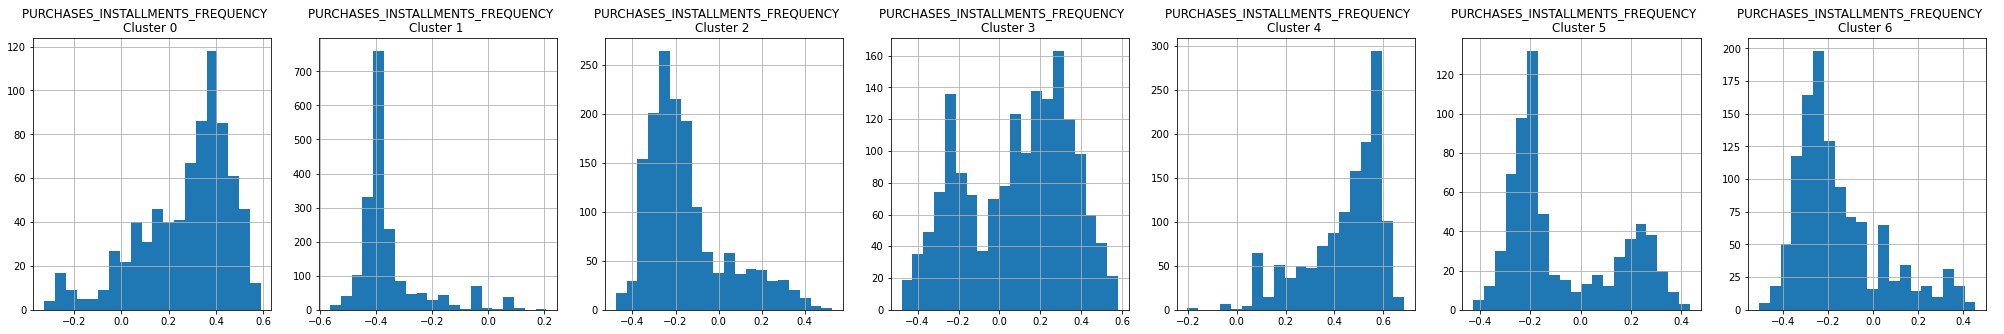

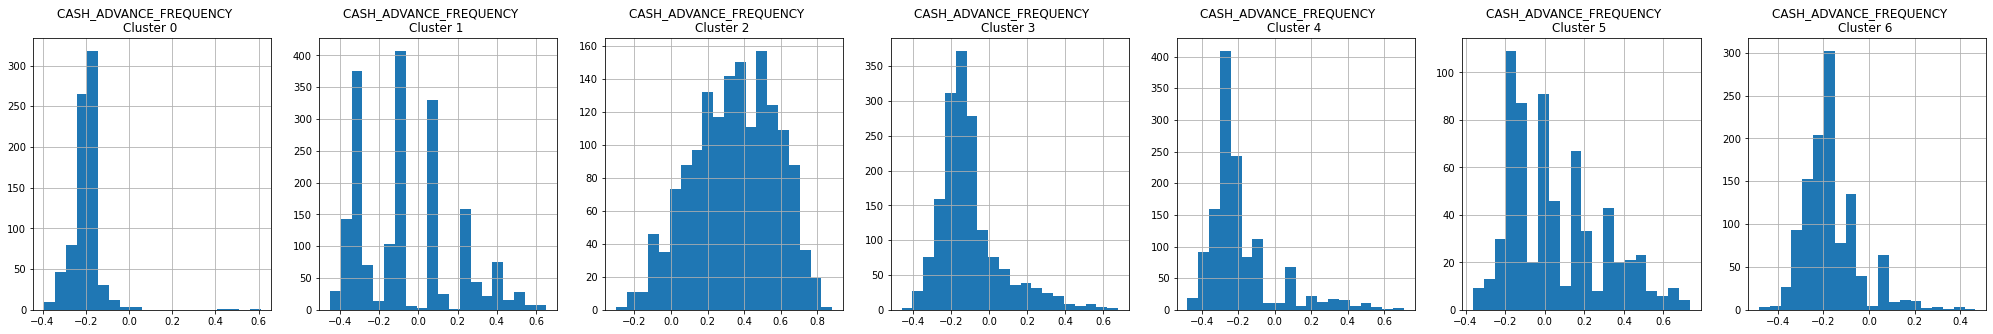

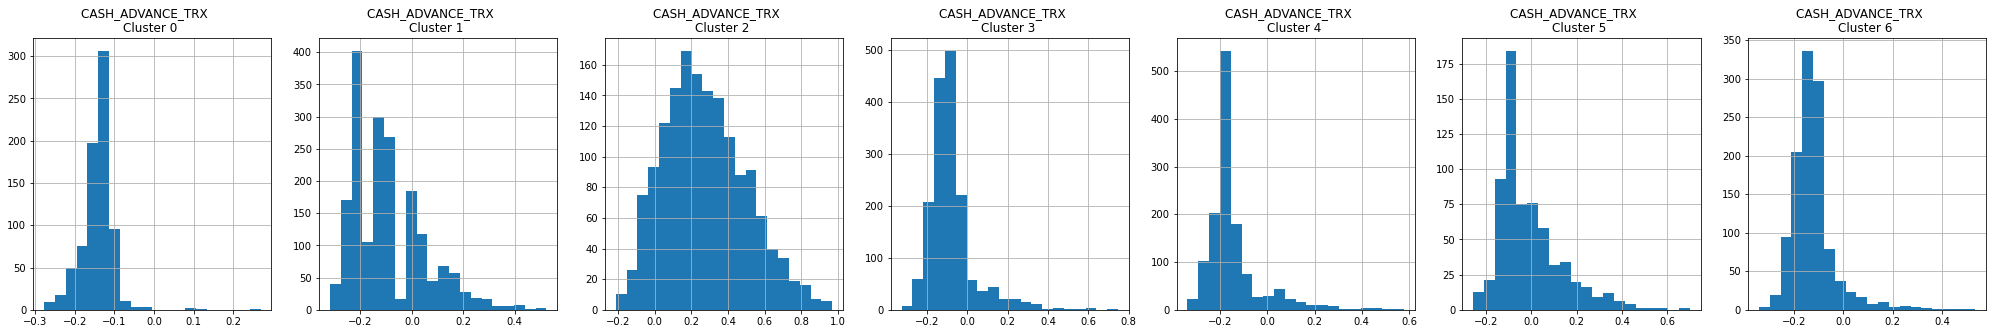

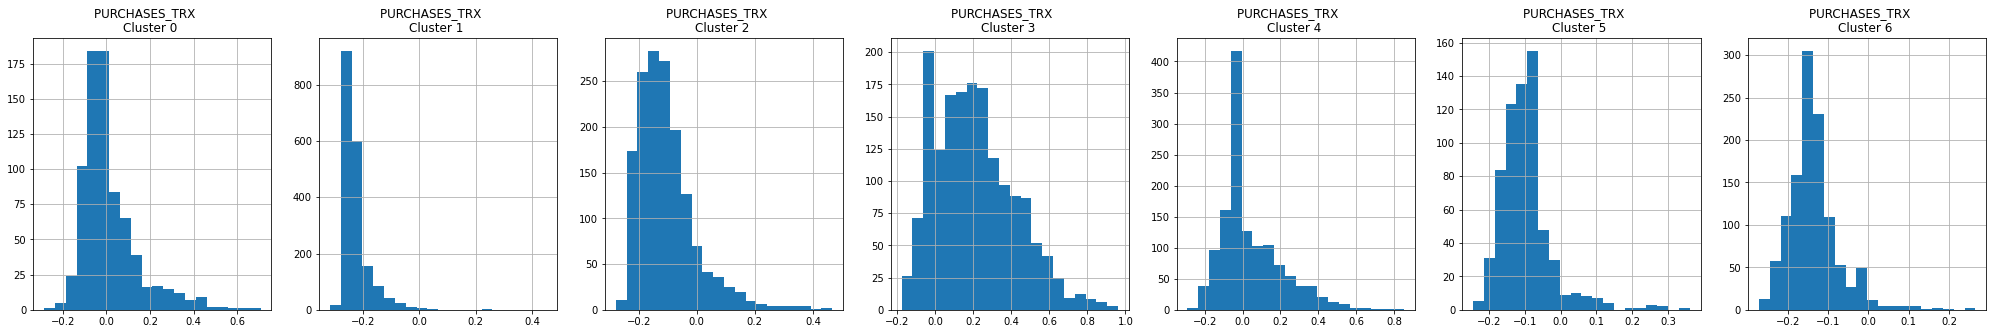

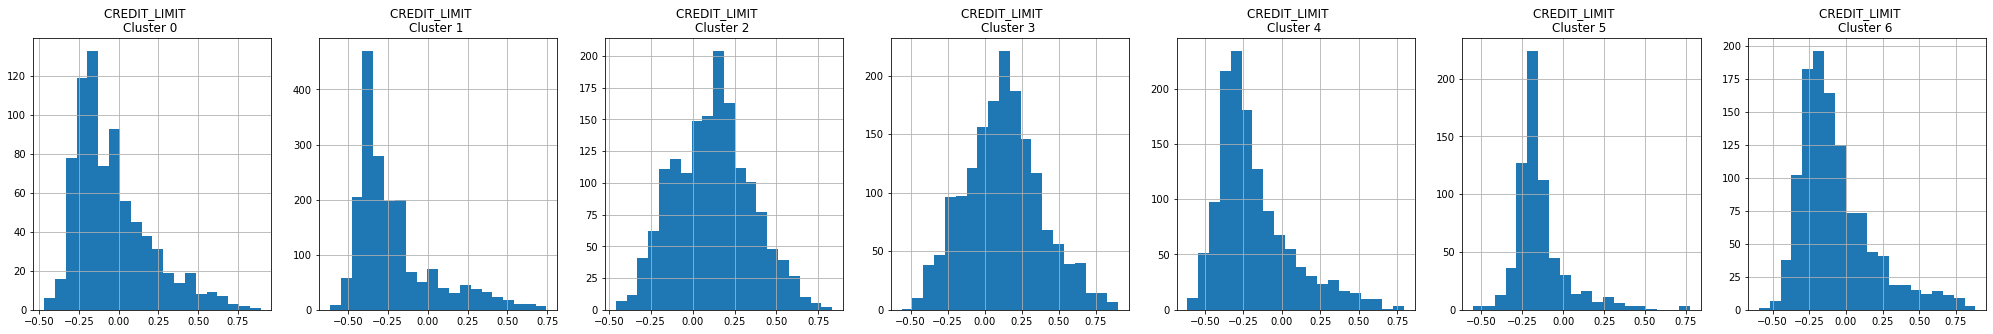

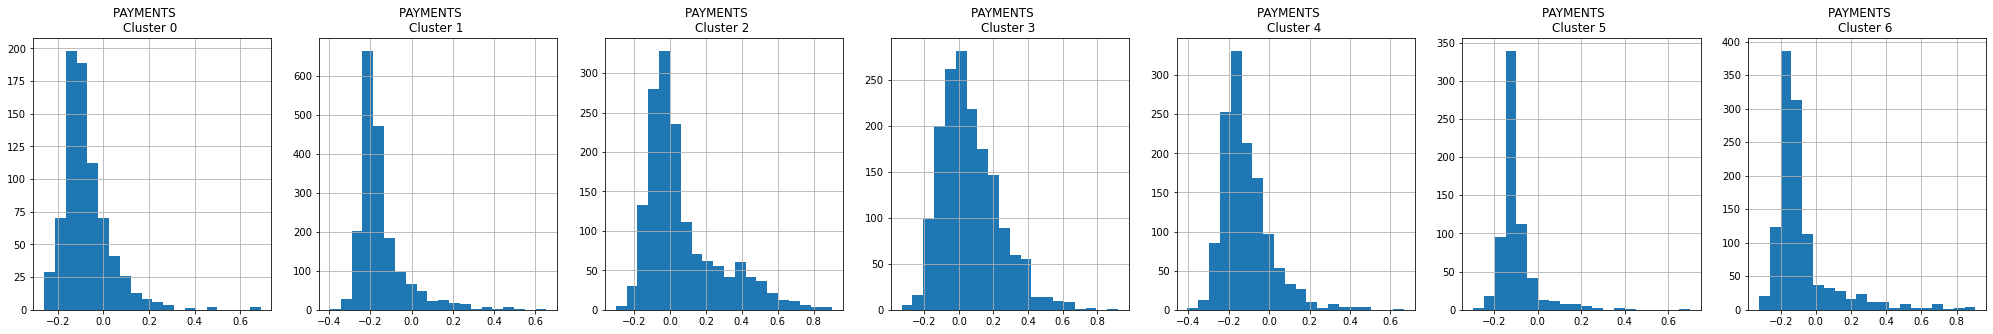

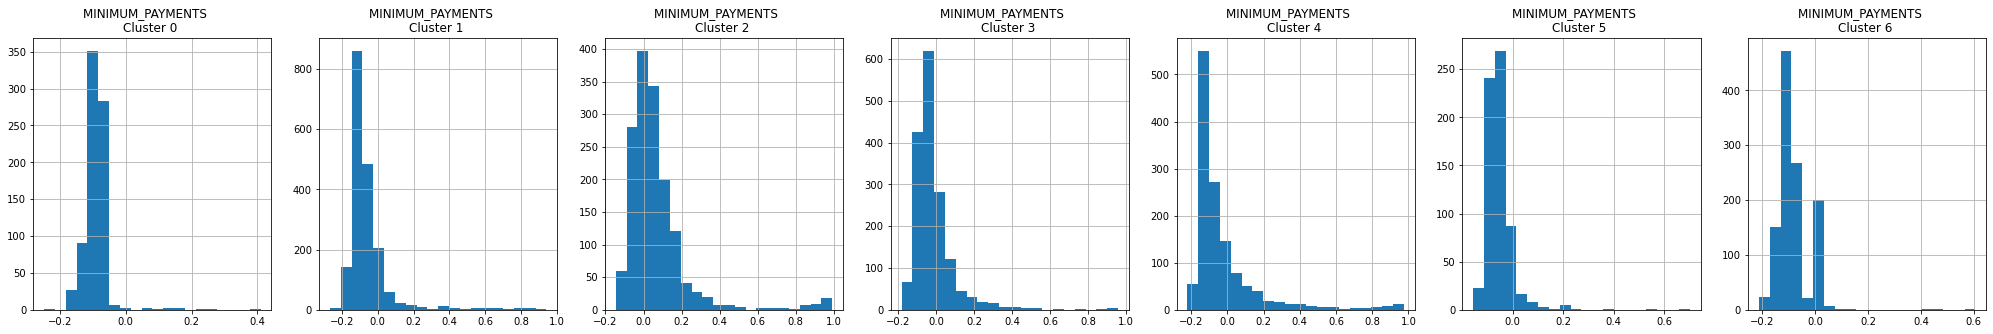

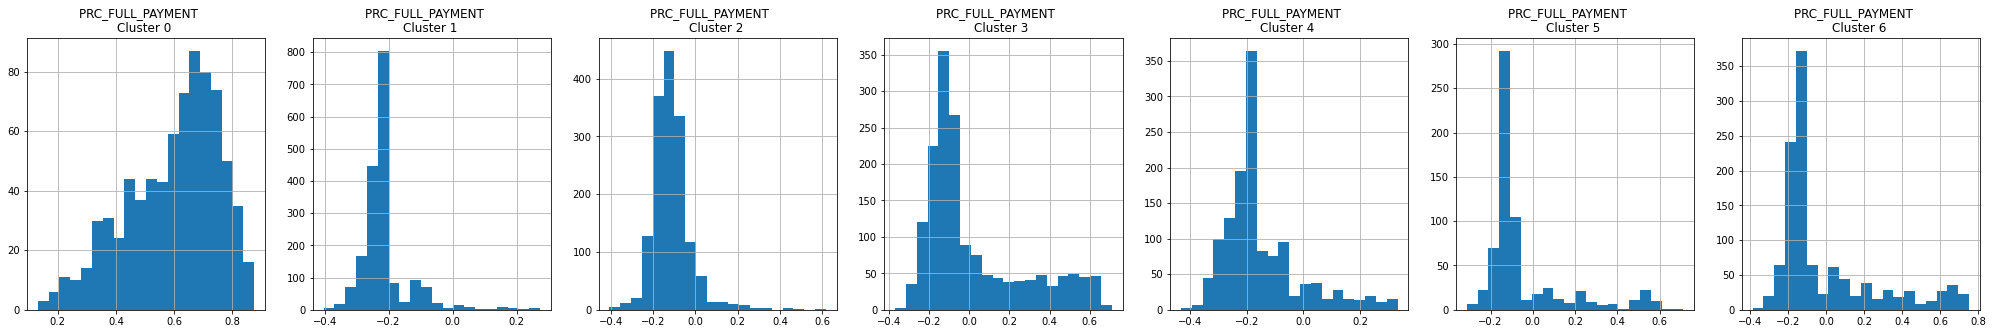

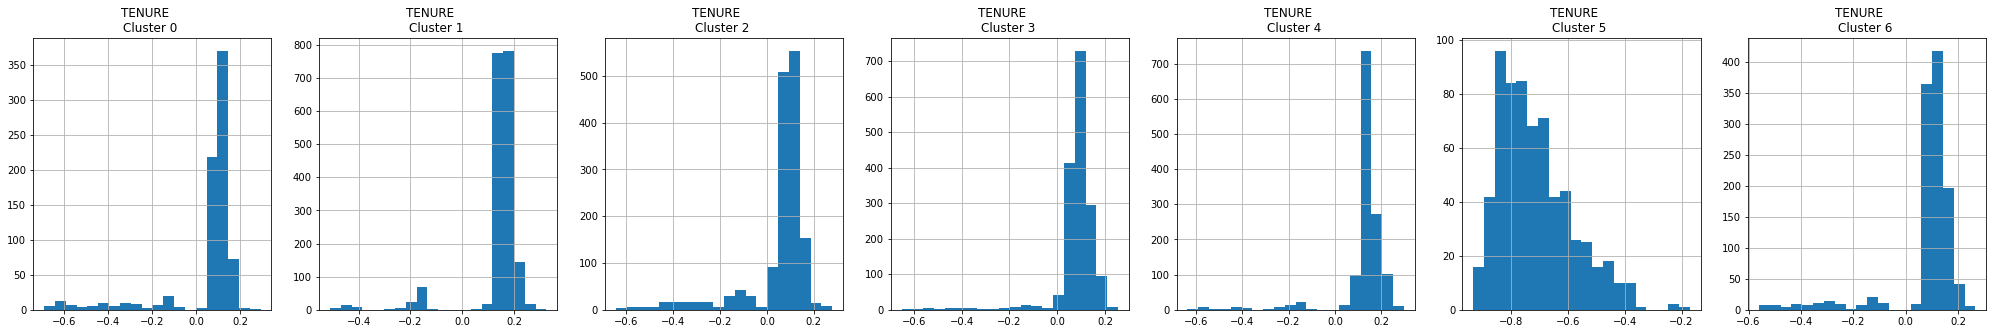

In [39]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


# APPLY PRINCIPAL COMPONENT ANALYSIS FOR REDUCTION AND VISUALIZE THE RESULTS

In [54]:
# Obtain the principal components 
pca = PCA(n_components=6)
principal_comp = pca.fit_transform(creditcard_df_normalized)
principal_comp

array([[-0.48982552, -0.67967839, -0.09745814,  0.11688634, -0.00375682,
        -0.04928132],
       [-0.5187911 ,  0.54501063,  0.19641218, -0.20264351, -0.26526426,
         0.19582944],
       [ 0.33088514,  0.26897791,  0.11587993,  0.746183  ,  0.13080873,
        -0.09870743],
       ...,
       [ 0.18879823, -0.24849762,  0.10435008, -0.40347447,  0.45896404,
        -0.33099525],
       [-0.31301786, -0.17138333,  0.23350036, -0.28709252,  0.52556521,
        -0.2092259 ],
       [ 0.01292924,  0.09787255,  0.34469882, -0.06170158,  0.75970852,
        -0.43948756]])

In [55]:
pca.explained_variance_ratio_[:6].sum()

0.8126204101678512

We get 81% explained variance with just 6 components. We have reduce the dimensions from 16 variables to 6.

In [56]:
# Create a dataframe with the six components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2','pca3','pca4','pca5','pca6'])
pca_df.head()

pca1      pca2      pca3      pca4      pca5      pca6
0 -0.489826 -0.679678 -0.097458  0.116886 -0.003757 -0.049281
1 -0.518791  0.545011  0.196412 -0.202644 -0.265264  0.195829
2  0.330885  0.268978  0.115880  0.746183  0.130809 -0.098707
3 -0.482374 -0.092111  0.453704  0.288995 -0.397096 -0.260659
4 -0.563289 -0.481915 -0.256500  0.323868  0.028085  0.085078

# Apply K-mean clustring using PCA with 6 components and find the optimal number of cluster using Elbow method and Silhouette Coefficient Method

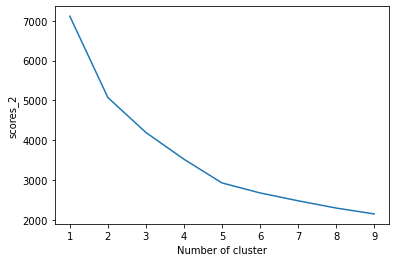

In [57]:
scores_2 = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca_df)
    scores_2[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(scores_2.keys()), list(scores_2.values()))
plt.xlabel("Number of cluster")
plt.ylabel("scores_2")
plt.show()

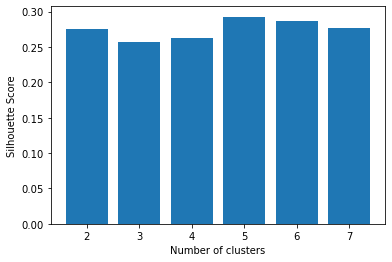

In [58]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(pca_df, KMeans(n_clusters = n_cluster).fit_predict(pca_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

From this we can observe that, 5th cluster seems to be forming the elbow of the curve. Also, n=5 seems to have higher silhouette than the others. we will select 5 as our number of clusters.


k-mean cluster with k=5 and 6 PCA

In [61]:
kmeans_p = KMeans(5)
kmeans_p.fit(pca_df)
labels = kmeans_p.labels_

In [64]:
cluster_centers_p = pd.DataFrame(data = kmeans_p.cluster_centers_, columns = [pca_df.columns])
cluster_centers_p   

pca1      pca2      pca3      pca4      pca5      pca6
0  0.549577  0.266581  0.129262  0.330288  0.092138  0.004741
1  0.528152 -0.238619 -0.253114 -0.221519 -0.047912  0.032768
2 -0.369571  0.568785 -0.017401 -0.187274 -0.008225  0.019371
3 -0.567686 -0.213908 -0.208274  0.199806 -0.005514  0.074814
4 -0.168519 -0.373738  0.455624 -0.137875 -0.028490 -0.163213

In [69]:
y_kmeans_p = kmeans_p.fit_predict(pca_df)
y_kmeans_p

array([3, 4, 1, ..., 0, 0, 0])

In [70]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster_p = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster_p.head()

pca1      pca2      pca3      pca4      pca5      pca6  cluster
0 -0.489826 -0.679678 -0.097458  0.116886 -0.003757 -0.049281        3
1 -0.518791  0.545011  0.196412 -0.202644 -0.265264  0.195829        2
2  0.330885  0.268978  0.115880  0.746183  0.130809 -0.098707        0
3 -0.482374 -0.092111  0.453704  0.288995 -0.397096 -0.260659        4
4 -0.563289 -0.481915 -0.256500  0.323868  0.028085  0.085078        3

Let's visualize cluster with first two principle components

In [71]:
pca1 = PCA(n_components=2)
principal_comp1 = pca1.fit_transform(creditcard_df_normalized)
principal_comp1

array([[-0.48982552, -0.67967817],
       [-0.51879104,  0.54501206],
       [ 0.33088508,  0.26897405],
       ...,
       [ 0.18879822, -0.24849765],
       [-0.31301788, -0.17138338],
       [ 0.01292922,  0.09787173]])

In [74]:
# Create a dataframe with the two components
pca_df1 = pd.DataFrame(data = principal_comp1, columns =['pca1','pca2'])
pca_df1.head()

pca1      pca2
0 -0.489826 -0.679678
1 -0.518791  0.545012
2  0.330885  0.268974
3 -0.482374 -0.092107
4 -0.563289 -0.481915

In [77]:
# Concatenate the clusters labels to the dataframe
pca_df1 = pd.concat([pca_df1,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df1.head()

pca1      pca2  cluster
0 -0.489826 -0.679678        3
1 -0.518791  0.545012        2
2  0.330885  0.268974        0
3 -0.482374 -0.092107        4
4 -0.563289 -0.481915        3

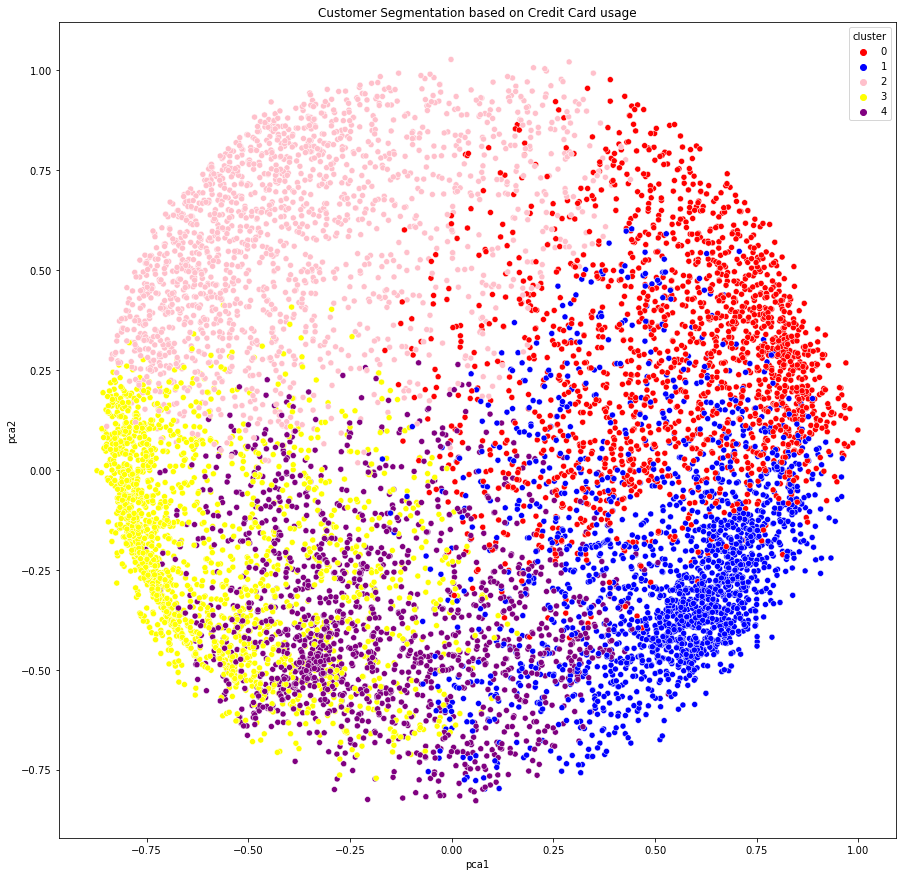

In [83]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df1, palette =['red','blue','pink','yellow','purple'])
ax.set_title("Customer Segmentation based on Credit Card usage")
plt.show()

# Behaviours observed:


Cluster 1 : Customers who use credit card for Installment Purchases. They do not make oneoff purchases at all.
Cluster 2 : Customers who use their credit card for all types of purchases and pay their bills in advance.
Cluster 3 : Customers who have a huge tendency of oneoff purchases and do it frequently. They also have high amount purchases.
Cluster 4 : Customers who dont make huge purchases on the credit card. Also, they pay the bill in advance.
Cluster 5 : Customers who use the credit card mostly for oneoff Purchases only. They also don't pay bills in advance.